<a href="https://colab.research.google.com/github/GouravLuinor/PersonalWellnessRecommender/blob/main/PersonalWellnessRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Part 1: Generating Larger Dataset (More Realistic) ---
✅ Dataset 'personal_wellness_dataset_large.csv' generated with 10000 rows.

--- Part 2: Training, Evaluating, and Predicting Multiple Outputs (Updated) ---

Training Multi-Output Regressor...
✅ Multi-Output Regressor Trained.

Training Classifiers...
  ✅ Classifier for 'Suggested Workout' Trained.
  ✅ Classifier for 'Meal Timing Advice' Trained.
  ✅ Classifier for 'Recommended Meal Frequency' Trained.
  ✅ Classifier for 'Overall Wellness Score' Trained.
✅ All Classifiers Trained.

--- Evaluating Models on Test Set (Updated) ---

Regression Model Evaluation:
  Target: Recommended Calories
    RMSE: 343.5693
    MAE:  295.6886
  Target: Protein (g)
    RMSE: 43.3137
    MAE:  37.3491
  Target: Carbs (g)
    RMSE: 57.6534
    MAE:  49.5756
  Target: Fats (g)
    RMSE: 17.3997
    MAE:  15.0783
  Target: New Sleep Duration (hrs)
    RMSE: 0.4306
    MAE:  0.3284
  Target: Recommended Workout Duration (hrs)
    RMSE: 0.4171
    MAE:

<ipython-input-4-6ea932b103be>:451: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=training_data[col], order=order, palette='viridis') # Use horizontal countplot for better label visibility
<ipython-input-4-6ea932b103be>:451: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=training_data[col], order=order, palette='viridis') # Use horizontal countplot for better label visibility
<ipython-input-4-6ea932b103be>:451: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=training_data[col], order=order, palette='viridis') # Use horizontal countp

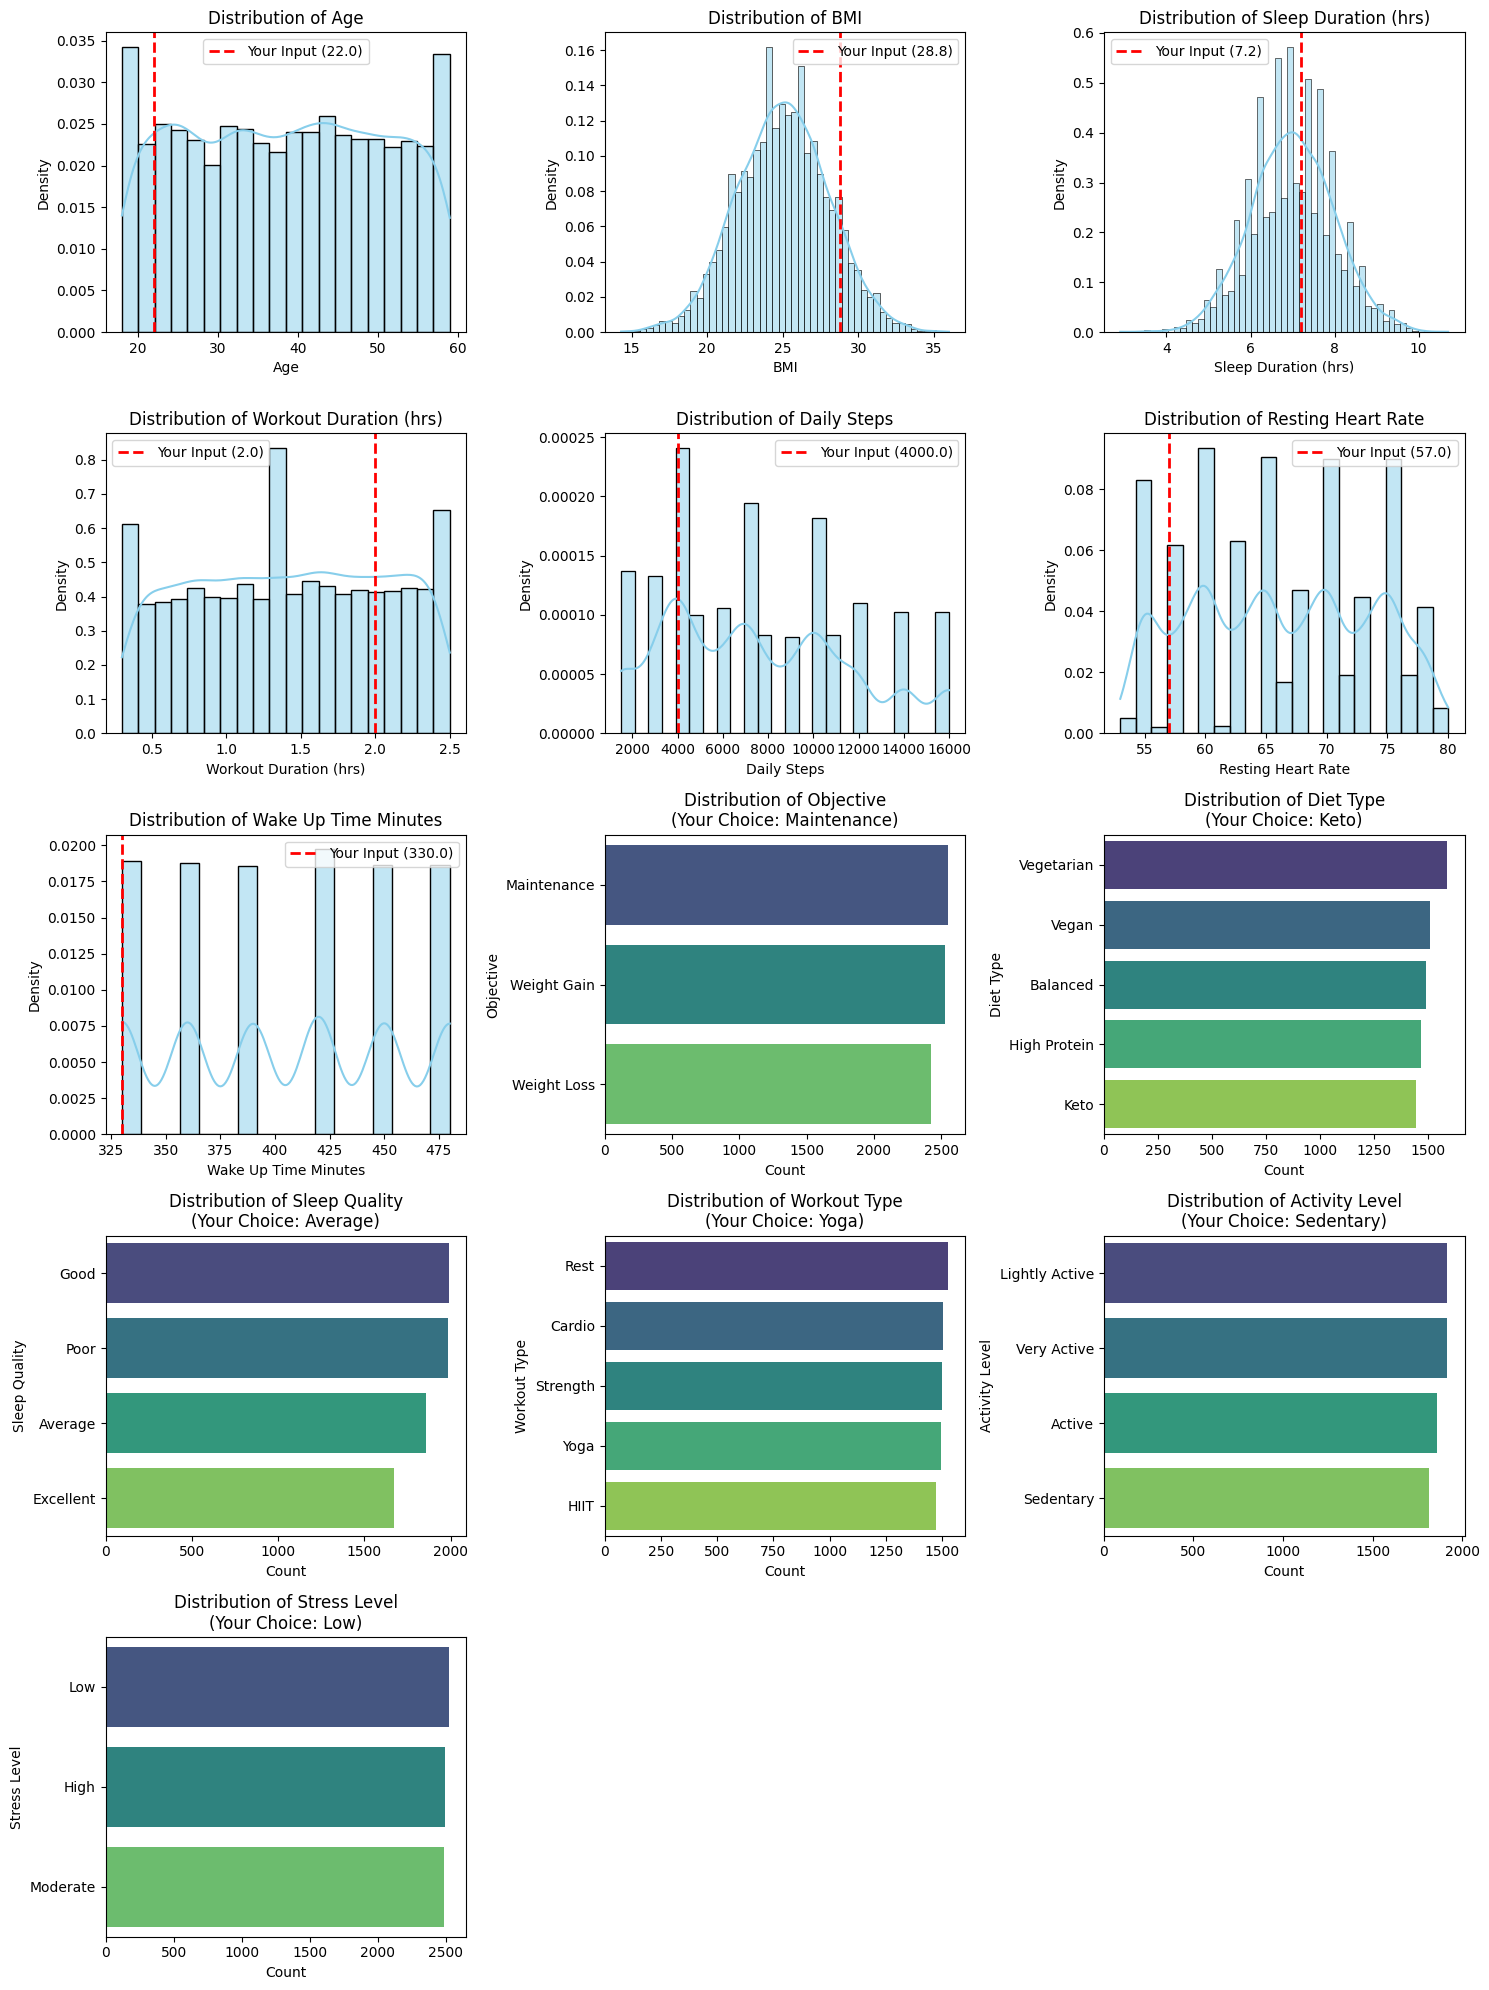


=== Wellness Recommendations ===
                                          Recommendation
Recommended Calories                                2318
Protein (g)                                        131.0
Carbs (g)                                          275.2
Fats (g)                                            71.8
New Sleep Duration (hrs)                             7.6
Recommended Workout Duration (hrs)                   2.0
Target Daily Steps                                  8031
Suggested Workout                           Light Cardio
Meal Timing Advice                  Intermittent Fasting
Recommended Meal Frequency                 3 Meals a Day
Overall Wellness Score                         Excellent

Would you like to make another prediction? (y/n): n

Thank you for using the Wellness Prediction System!


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')




# === PART 1: Data Generation  ===
print("--- Part 1: Generating Larger Dataset (More Realistic) ---")

def generate_data(num_samples=10000, filename='personal_wellness_dataset_large.csv'):
    """Generates synthetic wellness data with more realistic correlations and even more output features."""
    data = []
    stress_levels = ['Low', 'Moderate', 'High']
    moods = ['Happy', 'Sad', 'Neutral', 'Energetic', 'Tired']
    hydration_levels = ['Low', 'Medium', 'High']
    mental_focus_levels = ['Low', 'Medium', 'High']
    bowel_movement_frequency = ['Daily', 'Every Other Day', 'Twice Daily', 'Irregular']
    energy_levels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
    water_intake_ml_options = [1500, 2000, 2500, 3000, 3500]
    steps_taken_options = [3000, 5000, 7000, 10000, 12000]
    heart_rate_resting_options = [55, 60, 65, 70, 75]
    systolic_bp_options = [110, 120, 130]
    diastolic_bp_options = [70, 80, 90]
    cholesterol_levels_options = ['Normal', 'Borderline High', 'High']
    blood_sugar_levels_options = ['Normal', 'Prediabetes', 'Diabetes']
    recommended_water_ml_options = [2000, 2500, 3000]
    suggested_meal_timing_options = ['Regular Intervals', 'Intermittent Fasting', 'Time-Restricted Eating']
    recommended_supplements_options = [['Vitamin D', 'Omega-3'], ['Magnesium', 'Zinc'], ['Probiotics'], [], ['Multivitamin']]
    suggested_mindfulness_activity_options = ['Meditation', 'Deep Breathing', 'Yoga', 'Nature Walk', 'Reading']
    sleep_efficiency_percentage_options = [70, 80, 90, 95]
    meal_frequency_options = ['3 Meals a Day', '5-6 Smaller Meals', '2-3 Larger Meals']
    wellness_score_options = ['Poor', 'Average', 'Good', 'Excellent']

    for _ in range(num_samples):
        age = np.random.randint(18, 60)
        bmi = round(np.random.normal(25, 3), 1) # More centered around a typical average
        objective = random.choice(['Weight Gain', 'Weight Loss', 'Maintenance'])
        timeline = random.choice(['1 Month', '3 Months', '6 Months'])
        diet_type = random.choice(['Vegan', 'Vegetarian', 'Keto', 'High Protein', 'Balanced'])
        workout_hours = round(np.random.uniform(0.3, 2.5), 1) # Slightly wider range
        workout_type = random.choice(['Cardio', 'Strength', 'Yoga', 'HIIT', 'Rest'])
        activity_level_options = ['Sedentary', 'Lightly Active', 'Active', 'Very Active']
        # Realistic correlation: Activity level influences steps
        if bmi > 30: # Higher BMI tends towards less activity
            activity_level = random.choices(activity_level_options, weights=[0.4, 0.3, 0.2, 0.1], k=1)[0]
        elif bmi < 20: # Lower BMI might be associated with higher activity
            activity_level = random.choices(activity_level_options, weights=[0.1, 0.2, 0.3, 0.4], k=1)[0]
        else:
            activity_level = random.choice(activity_level_options)

        # Realistic correlation: Activity level and BMI influence daily steps
        if activity_level == 'Sedentary':
            daily_steps = random.choice([1500, 3000, 4000])
        elif activity_level == 'Lightly Active':
            daily_steps = random.choice([4000, 5000, 6000, 7000])
        elif activity_level == 'Active':
            daily_steps = random.choice([7000, 8000, 9000, 10000, 11000])
        else: # Very Active
            daily_steps = random.choice([10000, 12000, 14000, 16000])

        stress_level = random.choice(stress_levels)
        # Realistic correlation: Stress can influence mood
        if stress_level == 'High':
            mood = random.choices(moods, weights=[0.2, 0.4, 0.3, 0.05, 0.05], k=1)[0]
        elif stress_level == 'Low':
            mood = random.choices(moods, weights=[0.5, 0.1, 0.2, 0.1, 0.1], k=1)[0]
        else:
            mood = random.choice(moods)

        # Realistic correlation: Water intake and hydration level
        water_intake_ml = random.choice(water_intake_ml_options)
        if water_intake_ml < 2000:
            hydration_level = random.choices(hydration_levels, weights=[0.6, 0.3, 0.1], k=1)[0]
        elif water_intake_ml < 3000:
            hydration_level = random.choices(hydration_levels, weights=[0.1, 0.6, 0.3], k=1)[0]
        else:
            hydration_level = random.choices(hydration_levels, weights=[0.05, 0.3, 0.65], k=1)[0]

        mental_focus = random.choice(mental_focus_levels)
        bowel_movement = random.choice(bowel_movement_frequency)

        # Realistic correlation: Age and BMI might influence resting heart rate
        resting_heart_rate_base = 70
        resting_heart_rate_adjustment = 0
        if age > 45:
            resting_heart_rate_adjustment += 3
        if bmi > 28:
            resting_heart_rate_adjustment += 2
        elif bmi < 20:
            resting_heart_rate_adjustment -= 2
        resting_heart_rate = np.clip(random.choice(heart_rate_resting_options) + resting_heart_rate_adjustment, 50, 85)

        # Realistic correlation: Age and BMI might influence blood pressure
        systolic_pressure_base = 120
        diastolic_pressure_base = 80
        bp_adjustment_systolic = 0
        bp_adjustment_diastolic = 0
        if age > 50:
            bp_adjustment_systolic += 5
            bp_adjustment_diastolic += 3
        if bmi > 30:
            bp_adjustment_systolic += 8
            bp_adjustment_diastolic += 5
        systolic_pressure = np.clip(random.choice(systolic_bp_options) + bp_adjustment_systolic, 100, 150)
        diastolic_pressure = np.clip(random.choice(diastolic_bp_options) + bp_adjustment_diastolic, 60, 100)

        # Realistic correlation: Diet type can influence cholesterol and blood sugar
        if diet_type == 'Keto' or bmi > 30:
            cholesterol = random.choices(cholesterol_levels_options, weights=[0.5, 0.3, 0.2], k=1)[0]
            blood_sugar = random.choices(blood_sugar_levels_options, weights=[0.6, 0.3, 0.1], k=1)[0]
        elif diet_type == 'High Protein':
            cholesterol = random.choices(cholesterol_levels_options, weights=[0.6, 0.3, 0.1], k=1)[0]
            blood_sugar = random.choice(blood_sugar_levels_options)
        elif diet_type == 'Vegan':
            cholesterol = random.choices(cholesterol_levels_options, weights=[0.8, 0.15, 0.05], k=1)[0]
            blood_sugar = random.choice(blood_sugar_levels_options)
        else: # Balanced, Vegetarian
            cholesterol = random.choice(cholesterol_levels_options)
            blood_sugar = random.choice(blood_sugar_levels_options)

        recommended_calories = np.random.randint(1800, 3000)
        protein_g = np.random.randint(50, 200)
        carbs_g = np.random.randint(150, 350)
        fats_g = np.random.randint(40, 100)
        vitamins = random.sample(['A', 'B12', 'C', 'D', 'E', 'K', 'Folate'], 3)

        # Realistic correlation: Sleep duration and quality influence new sleep duration and energy
        sleep_duration = round(np.random.normal(7, 1), 1)
        wake_up_time_options = ['05:30', '06:00', '06:30', '07:00', '07:30', '08:00']
        if sleep_duration < 6:
            sleep_quality = random.choices(['Poor', 'Average', 'Good'], weights=[0.6, 0.3, 0.1], k=1)[0]
            perceived_energy_level = random.choices(energy_levels, weights=[0.6, 0.3, 0.1, 0.0, 0.0], k=1)[0]
            new_sleep_duration = round(np.clip(sleep_duration + np.random.normal(0.5, 0.3), 6, 8), 1)
            new_wake_up_time = random.choice(['06:30', '07:00', '07:30', '08:00'])
        elif sleep_duration > 8:
            sleep_quality = random.choices(['Average', 'Good', 'Excellent'], weights=[0.2, 0.5, 0.3], k=1)[0]
            perceived_energy_level = random.choices(energy_levels, weights=[0.0, 0.1, 0.3, 0.4, 0.2], k=1)[0]
            new_sleep_duration = round(np.clip(sleep_duration + np.random.normal(-0.3, 0.5), 7, 9), 1)
            new_wake_up_time = random.choice(['05:30', '06:00', '06:30', '07:00'])
        else:
            sleep_quality = random.choice(['Poor', 'Average', 'Good', 'Excellent'])
            perceived_energy_level = random.choice(energy_levels)
            new_sleep_duration = round(np.clip(sleep_duration + np.random.normal(0, 0.6), 6.5, 8.5), 1)
            new_wake_up_time = random.choice(['06:00', '06:30', '07:00', '07:15'])
        wake_up_time = random.choice(wake_up_time_options)

        suggested_workout = random.choice(['Cardio + Strength', 'HIIT + Yoga', 'Strength Focused', 'Light Cardio', 'Rest Day'])
        suggested_water_intake = random.choice(recommended_water_ml_options)
        meal_timing_advice = random.choice(suggested_meal_timing_options)
        suggested_supplements_list = random.choice(recommended_supplements_options)
        suggested_mindfulness = random.choice(suggested_mindfulness_activity_options)
        sleep_efficiency = random.choice(sleep_efficiency_percentage_options)
        recommended_workout_duration = round(np.clip(workout_hours + np.random.normal(0.2, 0.5), 0.5, 2.5), 1) # Suggest slightly adjusted workout duration
        recommended_meal_frequency = random.choice(meal_frequency_options)

        # NEW Output: Target Daily Steps (slightly higher than current if sedentary/lightly active)
        if activity_level in ['Sedentary', 'Lightly Active']:
            target_daily_steps = random.choice([7000, 8000, 9000])
        else:
            target_daily_steps = random.choice([10000, 11000, 12000, 13000])

        # NEW Output: Overall Wellness Score (based on multiple factors)
        wellness_factors = [bmi >= 18.5 and bmi <= 24.9, sleep_duration >= 7 and sleep_duration <= 9,
                            stress_level == 'Low' or stress_level == 'Moderate', mood in ['Happy', 'Energetic'],
                            hydration_level == 'High' or hydration_level == 'Medium', daily_steps >= 7000,
                            resting_heart_rate >= 55 and resting_heart_rate <= 75,
                            systolic_pressure >= 110 and systolic_pressure <= 130,
                            diastolic_pressure >= 70 and diastolic_pressure <= 90,
                            cholesterol_levels_options.index(cholesterol) < 2, # Normal or Borderline High
                            blood_sugar_levels_options.index(blood_sugar) < 2] # Normal or Prediabetes

        positive_factors = sum(wellness_factors)
        if positive_factors >= 9:
            overall_wellness_score = 'Excellent'
        elif positive_factors >= 7:
            overall_wellness_score = 'Good'
        elif positive_factors >= 5:
            overall_wellness_score = 'Average'
        else:
            overall_wellness_score = 'Poor'

        data.append({
            'Age': age, 'BMI': bmi, 'Objective': objective, 'Timeline': timeline, 'Diet Type': diet_type,
            'Sleep Duration (hrs)': sleep_duration, 'Wake Up Time': wake_up_time, 'Sleep Quality': sleep_quality,
            'Workout Duration (hrs)': workout_hours, 'Workout Type': workout_type, 'Activity Level': activity_level,
            'Stress Level': stress_level, 'Mood': mood, 'Hydration Level': hydration_level,
            'Mental Focus': mental_focus, 'Bowel Movement Frequency': bowel_movement, 'Daily Steps': daily_steps,
            'Resting Heart Rate': resting_heart_rate, 'Systolic Blood Pressure': systolic_pressure,
            'Diastolic Blood Pressure': diastolic_pressure,
            # --- Target Variables ---
            'Recommended Calories': recommended_calories, 'Protein (g)': protein_g, 'Carbs (g)': carbs_g, 'Fats (g)': fats_g,
            'Vitamins': ', '.join(vitamins), 'New Sleep Duration (hrs)': new_sleep_duration, 'New Wake Time': new_wake_up_time,
            'Suggested Workout': suggested_workout, 'Recommended Water Intake (ml)': suggested_water_intake,
            'Meal Timing Advice': meal_timing_advice,
            'Suggested Supplements': ', '.join(suggested_supplements_list) if suggested_supplements_list else None,
            'Suggested Mindfulness Activity': suggested_mindfulness, 'Perceived Energy Level': perceived_energy_level,
            'Sleep Efficiency (%)': sleep_efficiency, 'Cholesterol Level': cholesterol, 'Blood Sugar Level': blood_sugar,
            # --- NEW Target Variables ---
            'Recommended Workout Duration (hrs)': recommended_workout_duration,
            'Recommended Meal Frequency': recommended_meal_frequency,
            'Target Daily Steps': target_daily_steps,
            'Overall Wellness Score': overall_wellness_score
        })

    df = pd.DataFrame(data)
    # Ensuring target columns have consistent types if needed (usually okay here)
    df['New Sleep Duration (hrs)'] = df['New Sleep Duration (hrs)'].astype(float)
    df['Recommended Workout Duration (hrs)'] = df['Recommended Workout Duration (hrs)'].astype(float)
    df['Target Daily Steps'] = df['Target Daily Steps'].astype(int)
    df.to_csv(filename, index=False)
    print(f"✅ Dataset '{filename}' generated with {num_samples} rows.")
    return df # Return df for immediate use

# Generating the data if it doesn't exist, otherwise load it
DATA_FILENAME = 'personal_wellness_dataset_large.csv'
# Force data regeneration for this run
if os.path.exists(DATA_FILENAME):
    os.remove(DATA_FILENAME)
df = generate_data(num_samples=10000, filename=DATA_FILENAME)




# === PART 2: Machine Learning Model  ===
print("\n--- Part 2: Training, Evaluating, and Predicting Multiple Outputs ---")

# Define Input (Features) and Output (Targets)
# Using all original input columns
input_columns = [
    'Age', 'BMI', 'Objective', 'Timeline', 'Diet Type',
    'Sleep Duration (hrs)', 'Wake Up Time', 'Sleep Quality',
    'Workout Duration (hrs)', 'Workout Type', 'Activity Level',
    'Stress Level', 'Mood', 'Hydration Level', 'Mental Focus',
    'Bowel Movement Frequency', 'Daily Steps', 'Resting Heart Rate',
    'Systolic Blood Pressure', 'Diastolic Blood Pressure'
]

# Using original output columns for regression and classification
output_columns_reg = [
    'Recommended Calories', 'Protein (g)', 'Carbs (g)', 'Fats (g)',
    'New Sleep Duration (hrs)',
    'Recommended Workout Duration (hrs)',
    'Target Daily Steps' # NEW Regression Output
]
output_columns_clf = [
    'Suggested Workout', 'Meal Timing Advice',
    'Recommended Meal Frequency',
    'Overall Wellness Score' # NEW Classification Output
]

# Ensure target columns exist and handle potential missing data if necessary
df = df.dropna(subset=output_columns_reg + output_columns_clf) # Drop rows where targets are missing
df[output_columns_clf] = df[output_columns_clf].astype(str) # Ensure classifier targets are strings

X = df[input_columns]
y_reg = df[output_columns_reg]
y_clf = df[output_columns_clf]

# Identify Feature Types & Preprocessing
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

def time_to_minutes(time_str):
    if pd.isna(time_str): return np.nan
    try:
        # Handle potential float inputs if loaded incorrectly
        time_str = str(time_str).split('.')[0]
        hours, minutes = map(int, time_str.split(':'))
        return hours * 60 + minutes
    except Exception: # Catch broader errors during conversion
        return np.nan # Return NaN if conversion fails

# Create a copy to avoid SettingWithCopyWarning
X = X.copy()
X['Wake Up Time Minutes'] = X['Wake Up Time'].apply(time_to_minutes)

# Check if conversion resulted in NaNs and handle them (e.g., imputation or drop)
if X['Wake Up Time Minutes'].isnull().any():
    median_wake_time = X['Wake Up Time Minutes'].median()
    print(f"Warning: NaNs found in 'Wake Up Time Minutes'. Imputing with median: {median_wake_time}")
    X['Wake Up Time Minutes'].fillna(median_wake_time, inplace=True)


# Update feature lists *after* creating the new column
if 'Wake Up Time' in categorical_features:
    categorical_features.remove('Wake Up Time')
if 'Wake Up Time Minutes' not in numerical_features:
    numerical_features.append('Wake Up Time Minutes')

# Drop the original 'Wake Up Time' column
X = X.drop('Wake Up Time', axis=1)

# Redefine input columns to match the modified X DataFrame
current_input_columns = X.columns.tolist()
numerical_features = [col for col in numerical_features if col in current_input_columns]
categorical_features = [col for col in categorical_features if col in current_input_columns]


# --- Define Transformers and Preprocessor ---
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    # Use sparse_output=False if the model requires dense arrays
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep any other columns (shouldn't be any here)
)


# --- Define Models within Pipelines ---
# Increased estimators slightly, adjust other hyperparameters as needed
multi_output_regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('multioutput_reg', MultiOutputRegressor(RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1, max_depth=20, min_samples_split=8, min_samples_leaf=4)))
])

classifier_pipelines = {}
for target_col in output_columns_clf:
    classifier_pipelines[target_col] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        # Classifiers might benefit from different hyperparameters
        ('classifier', RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, max_depth=20, min_samples_split=8, min_samples_leaf=4, class_weight='balanced')) # Added class_weight
    ])


# --- Split Data ---
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.25, random_state=42 # Using 25% for test set
)

# --- Train Models ---
print("\nTraining Multi-Output Regressor...")
multi_output_regressor.fit(X_train, y_reg_train)
print("✅ Multi-Output Regressor Trained.")

print("\nTraining Classifiers...")
for target_col, pipeline in classifier_pipelines.items():
    current_y_clf_train = y_clf_train[target_col]
    pipeline.fit(X_train, current_y_clf_train)
    print(f"  ✅ Classifier for '{target_col}' Trained.")
print("✅ All Classifiers Trained.")





# === PART 2.5: Model Evaluation on Test Set ===
print("\n--- Evaluating Models on Test Set ---")

# Regression Evaluation
print("\nRegression Model Evaluation:")
y_reg_pred = multi_output_regressor.predict(X_test)

# Check if new regression columns are in y_reg_test
for col in output_columns_reg:
    if col not in y_reg_test.columns:
        print(f"Error: Column '{col}' not found in y_reg_test. Please ensure data generation and splitting are correct.")
        break
else:
    for i, col in enumerate(output_columns_reg):
        mse = mean_squared_error(y_reg_test[col], y_reg_pred[:, i])
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_reg_test[col], y_reg_pred[:, i])
        print(f"  Target: {col}")
        print(f"    RMSE: {rmse:.4f}")
        print(f"    MAE:  {mae:.4f}")

# Classification Evaluation
print("\nClassification Model Evaluation:")
for target_col, pipeline in classifier_pipelines.items():
    y_clf_pred_col = pipeline.predict(X_test)
    y_clf_true_col = y_clf_test[target_col]
    print(f"\n  Target: {target_col}")
    print(classification_report(y_clf_true_col, y_clf_pred_col, zero_division=0))





# === PART 3: User Interaction & Prediction Visualization ===


# Features to plot distributions for
NUMERICAL_FEATURES_TO_PLOT = ['Age', 'BMI', 'Sleep Duration (hrs)', 'Workout Duration (hrs)', 'Daily Steps', 'Resting Heart Rate', 'Wake Up Time Minutes']
CATEGORICAL_FEATURES_TO_PLOT = ['Objective', 'Diet Type', 'Sleep Quality', 'Workout Type', 'Activity Level', 'Stress Level']

def plot_input_vs_training_distribution(user_input_dict, training_data, num_cols, cat_cols):
    """Plots user input against training data distributions."""
    print("\n--- Visualizing Your Input vs. Training Data ---")
    num_plots = len(num_cols) + len(cat_cols)
    if num_plots == 0:
        print("No features selected for plotting.")
        return

    # Dynamically adjust figure size and layout
    cols_per_row = 3
    num_rows = (num_plots + cols_per_row - 1) // cols_per_row
    plt.figure(figsize=(cols_per_row * 5, num_rows * 4)) # Adjusted figure size

    plot_index = 1

    # Numerical Plots
    print("Plotting numerical feature distributions...")
    for col in num_cols:
        if col not in user_input_dict or col not in training_data.columns:
            print(f"  Skipping plot for '{col}': Missing in input or training data.")
            continue
        plt.subplot(num_rows, cols_per_row, plot_index)
        sns.histplot(training_data[col], kde=True, color='skyblue', stat='density') # Use density for KDE overlay
        try:
            user_val = float(user_input_dict[col]) # Ensure it's numeric
            plt.axvline(user_val, color='red', linestyle='--', linewidth=2, label=f'Your Input ({user_val:.1f})')
            plt.legend()
        except (ValueError, TypeError):
            print(f"  Warning: Could not plot user value for '{col}' (invalid format: {user_input_dict.get(col, 'N/A')}).")
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Density') # Label Y-axis as Density
        plot_index += 1

    # Categorical Plots
    print("Plotting categorical feature distributions...")
    for col in cat_cols:
        if col not in user_input_dict or col not in training_data.columns:
            print(f"  Skipping plot for '{col}': Missing in input or training data.")
            continue
        plt.subplot(num_rows, cols_per_row, plot_index)
        order = training_data[col].value_counts().index # Order bars by frequency
        sns.countplot(y=training_data[col], order=order, palette='viridis') # Use horizontal countplot for better label visibility

        # Highlight user's choice textually
        user_choice = user_input_dict.get(col, 'N/A')
        plt.title(f'Distribution of {col}\n(Your Choice: {user_choice})')
        plt.xlabel('Count')
        plt.ylabel(col)
        plot_index += 1

    plt.tight_layout() # Adjust spacing
    plt.show()


def get_user_input(df_columns, numeric_cols, cat_cols_map):
    """Get user input for prediction, dynamically using available columns and options."""
    print("\n=== Wellness Prediction Input ===")
    print("Choose input method:")
    print("1. Use default sample data")
    print("2. Enter custom values")
    print("3. Generate random sample from loaded data")

    choice = input("Enter your choice (1-3): ").strip()

    if choice == '1':
        print("Using default sample data.")
        # Default sample data - ensure it matches the required input_columns
        default_data = {
            'Age': 35, 'BMI': 22.5, 'Objective': 'Maintenance', 'Timeline': '3 Months',
            'Diet Type': 'Balanced', 'Sleep Duration (hrs)': 7.5, 'Wake Up Time': '06:30',
            'Sleep Quality': 'Good', 'Workout Duration (hrs)': 1.0, 'Workout Type': 'Cardio',
            'Activity Level': 'Active', 'Stress Level': 'Moderate', 'Mood': 'Happy',
            'Hydration Level': 'Medium', 'Mental Focus': 'High', 'Bowel Movement Frequency': 'Daily',
            'Daily Steps': 10000, 'Resting Heart Rate': 65, 'Systolic Blood Pressure': 120,
            'Diastolic Blood Pressure': 80
        }
         # Filter default data to only include columns present in X before time conversion
        original_input_cols = set(input_columns)
        return {k: v for k, v in default_data.items() if k in original_input_cols}

    elif choice == '2':
        print("\nPlease enter the following information:")
        data = {}
        all_input_cols = numeric_cols + list(cat_cols_map.keys())

        # Get numeric inputs (original numeric features + Wake Up Time)
        num_original = [col for col in input_columns if col in df.select_dtypes(include=np.number).columns]
        for col in num_original:
            while True:
                try:
                    data[col] = float(input(f"{col}: "))
                    break
                except ValueError:
                    print("Invalid input. Please enter a number.")

        # Get categorical inputs (original categorical features including Wake Up Time)
        cat_original = [col for col in input_columns if col in df.select_dtypes(include=['object']).columns or col=='Wake Up Time']
        for col in cat_original:
            if col == 'Wake Up Time':
                while True:
                    time_str = input("Wake Up Time (HH:MM format, e.g. 06:30): ")
                    # Basic validation for format
                    try:
                        datetime.strptime(time_str, '%H:%M')
                        data[col] = time_str
                        break
                    except ValueError:
                        print("Invalid format. Please use HH:MM.")
            else:
                options = df[col].unique().tolist()
                options_str = ", ".join(map(str, options))
                while True:
                    val = input(f"{col} ({options_str}): ")
                    # Basic check if input is among options (case-insensitive for flexibility)
                    if val.lower() in [str(opt).lower() for opt in options]:
                        # Find the original casing to store
                        matched_option = next((opt for opt in options if str(opt).lower() == val.lower()), None)
                        data[col] = matched_option
                        break
                    else:
                        print(f"Invalid option. Please choose from: {options_str}")
        return data

    elif choice == '3':
        print("Generating random input data from the dataset...")
        # Sample from the original DataFrame *before* preprocessing 'Wake Up Time'
        random_sample = df[input_columns].sample(1).to_dict('records')[0]
        return random_sample
    else:
        print("Invalid choice. Please try again.")
        # Need the original df columns, numerical features, and categorical map for recursion
        original_numeric_cols = df[input_columns].select_dtypes(include=np.number).columns.tolist()
        original_cat_cols = df[input_columns].select_dtypes(include=['object','category']).columns.tolist()
        cat_map = {col: df[col].unique().tolist() for col in original_cat_cols}
        return get_user_input(input_columns, original_numeric_cols, cat_map)


def prepare_input_data(input_dict):
    """Convert user input dictionary to DataFrame and apply time conversion."""
    input_df = pd.DataFrame([input_dict])
    # Apply the same time conversion as used in training preprocessing
    input_df['Wake Up Time Minutes'] = input_df['Wake Up Time'].apply(time_to_minutes)

    # Handle potential NaNs from conversion in user input (e.g., fill with training median)
    if input_df['Wake Up Time Minutes'].isnull().any():

        try:
            time_col_index = numerical_features.index('Wake Up Time Minutes')
            # Access the fitted scaler and its median (StandardScaler doesn't store median directly, need to use training data)
            median_wake_time = X_train['Wake Up Time Minutes'].median() # Fallback to X_train median
            print(f"Warning: User 'Wake Up Time' invalid. Imputing with training median: {median_wake_time}")
        except (AttributeError, ValueError, IndexError):
            # Fallback if preprocessor structure is different or median unavailable
            median_wake_time = X_train['Wake Up Time Minutes'].median()
            print(f"Warning: User 'Wake Up Time' invalid. Imputing with training median: {median_wake_time}")

        input_df['Wake Up Time Minutes'].fillna(median_wake_time, inplace=True)

    input_df = input_df.drop('Wake Up Time', axis=1)

    input_df = input_df.reindex(columns=X_train.columns, fill_value=0) # Fill missing columns with 0 or another appropriate value

    return input_df


def make_predictions(input_data_dict):
    """Make predictions using the trained models and return as dict."""
    # Prepare the input data (applies time conversion)
    processed_input_df = prepare_input_data(input_data_dict)

    # Store predictions
    all_predictions = {}

    # Regression predictions
    reg_predictions_array = multi_output_regressor.predict(processed_input_df)
    for i, col in enumerate(output_columns_reg):
        # Apply rounding or formatting as needed
        pred_val = reg_predictions_array[0, i]
        if col == 'Recommended Calories':
            all_predictions[col] = int(round(pred_val))
        elif col == 'New Sleep Duration (hrs)':
            all_predictions[col] = round(pred_val, 1)
        elif col == 'Recommended Workout Duration (hrs)': # NEW Regression Output
            all_predictions[col] = round(pred_val, 1)
        elif col == 'Target Daily Steps': # NEW Regression Output
            all_predictions[col] = int(round(pred_val))
        else: # Macros
            all_predictions[col] = round(pred_val, 1)

    # Classification predictions
    for target_col, pipeline in classifier_pipelines.items():
        clf_pred = pipeline.predict(processed_input_df)[0]
        all_predictions[target_col] = clf_pred

    return all_predictions

def main():
    """Main function to run the wellness prediction system."""

    while True:
        # Get user input (provide necessary info for dynamic prompts)
        num_cols_for_input = df[input_columns].select_dtypes(include=np.number).columns.tolist()
        cat_cols_for_input = df[input_columns].select_dtypes(include=['object','category']).columns.tolist()
        cat_map_for_input = {col: df[col].unique().tolist() for col in cat_cols_for_input if col!= 'Wake Up Time'} # Exclude Wake Up Time here as it's handled separately

        user_data = get_user_input(input_columns, num_cols_for_input, cat_map_for_input)

        # Display the input data
        print("\nYour Input Data:")
        # Convert dict to DataFrame for nice printing
        print(pd.DataFrame([user_data]).T.rename(columns={0:'Value'}).to_string())

        # Visualize user input against training data
        # Ensure user_data has the 'Wake Up Time Minutes' if needed for plotting
        user_data_for_plot = user_data.copy()
        # Temporarily calculate time in minutes for plotting if not already done
        if 'Wake Up Time' in user_data_for_plot and 'Wake Up Time Minutes' not in user_data_for_plot:
            user_data_for_plot['Wake Up Time Minutes'] = time_to_minutes(user_data_for_plot['Wake Up Time'])


        plot_input_vs_training_distribution(
            user_data_for_plot,
            X_train, # Use training data for distribution plots
            NUMERICAL_FEATURES_TO_PLOT,
            CATEGORICAL_FEATURES_TO_PLOT
        )

        # Make predictions
        predictions = make_predictions(user_data)

        # Display predictions in a table
        print("\n=== Wellness Recommendations ===")
        predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['Recommendation'])
        print(predictions_df.to_string()) # Use to_string() for better console table formatting

        # Ask if user wants to try again
        repeat = input("\nWould you like to make another prediction? (y/n): ").lower().strip()
        if repeat != 'y':
            print("\nThank you for using the Wellness Prediction System!")
            break

if __name__ == "__main__":
    main()